# Kapitel 3.6: Neuronale Netze - Irisdatensatz

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline


Bad key text.latex.unicode in file D:\anaconda3\envs\Intro_DSKI_ML\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file D:\anaconda3\envs\Intro_DSKI_ML\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file D:\anaconda3\envs\Intro_DSKI_ML\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Mod

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow

In [5]:
import sklearn
print(sklearn.__version__)

1.0.2


In [6]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [7]:
import keras
print(keras.__version__)

2.4.3


In [8]:
import pandas as pd
print(pd.__version__)

1.3.5


## Iris mit Neuronalen Netzwerken

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

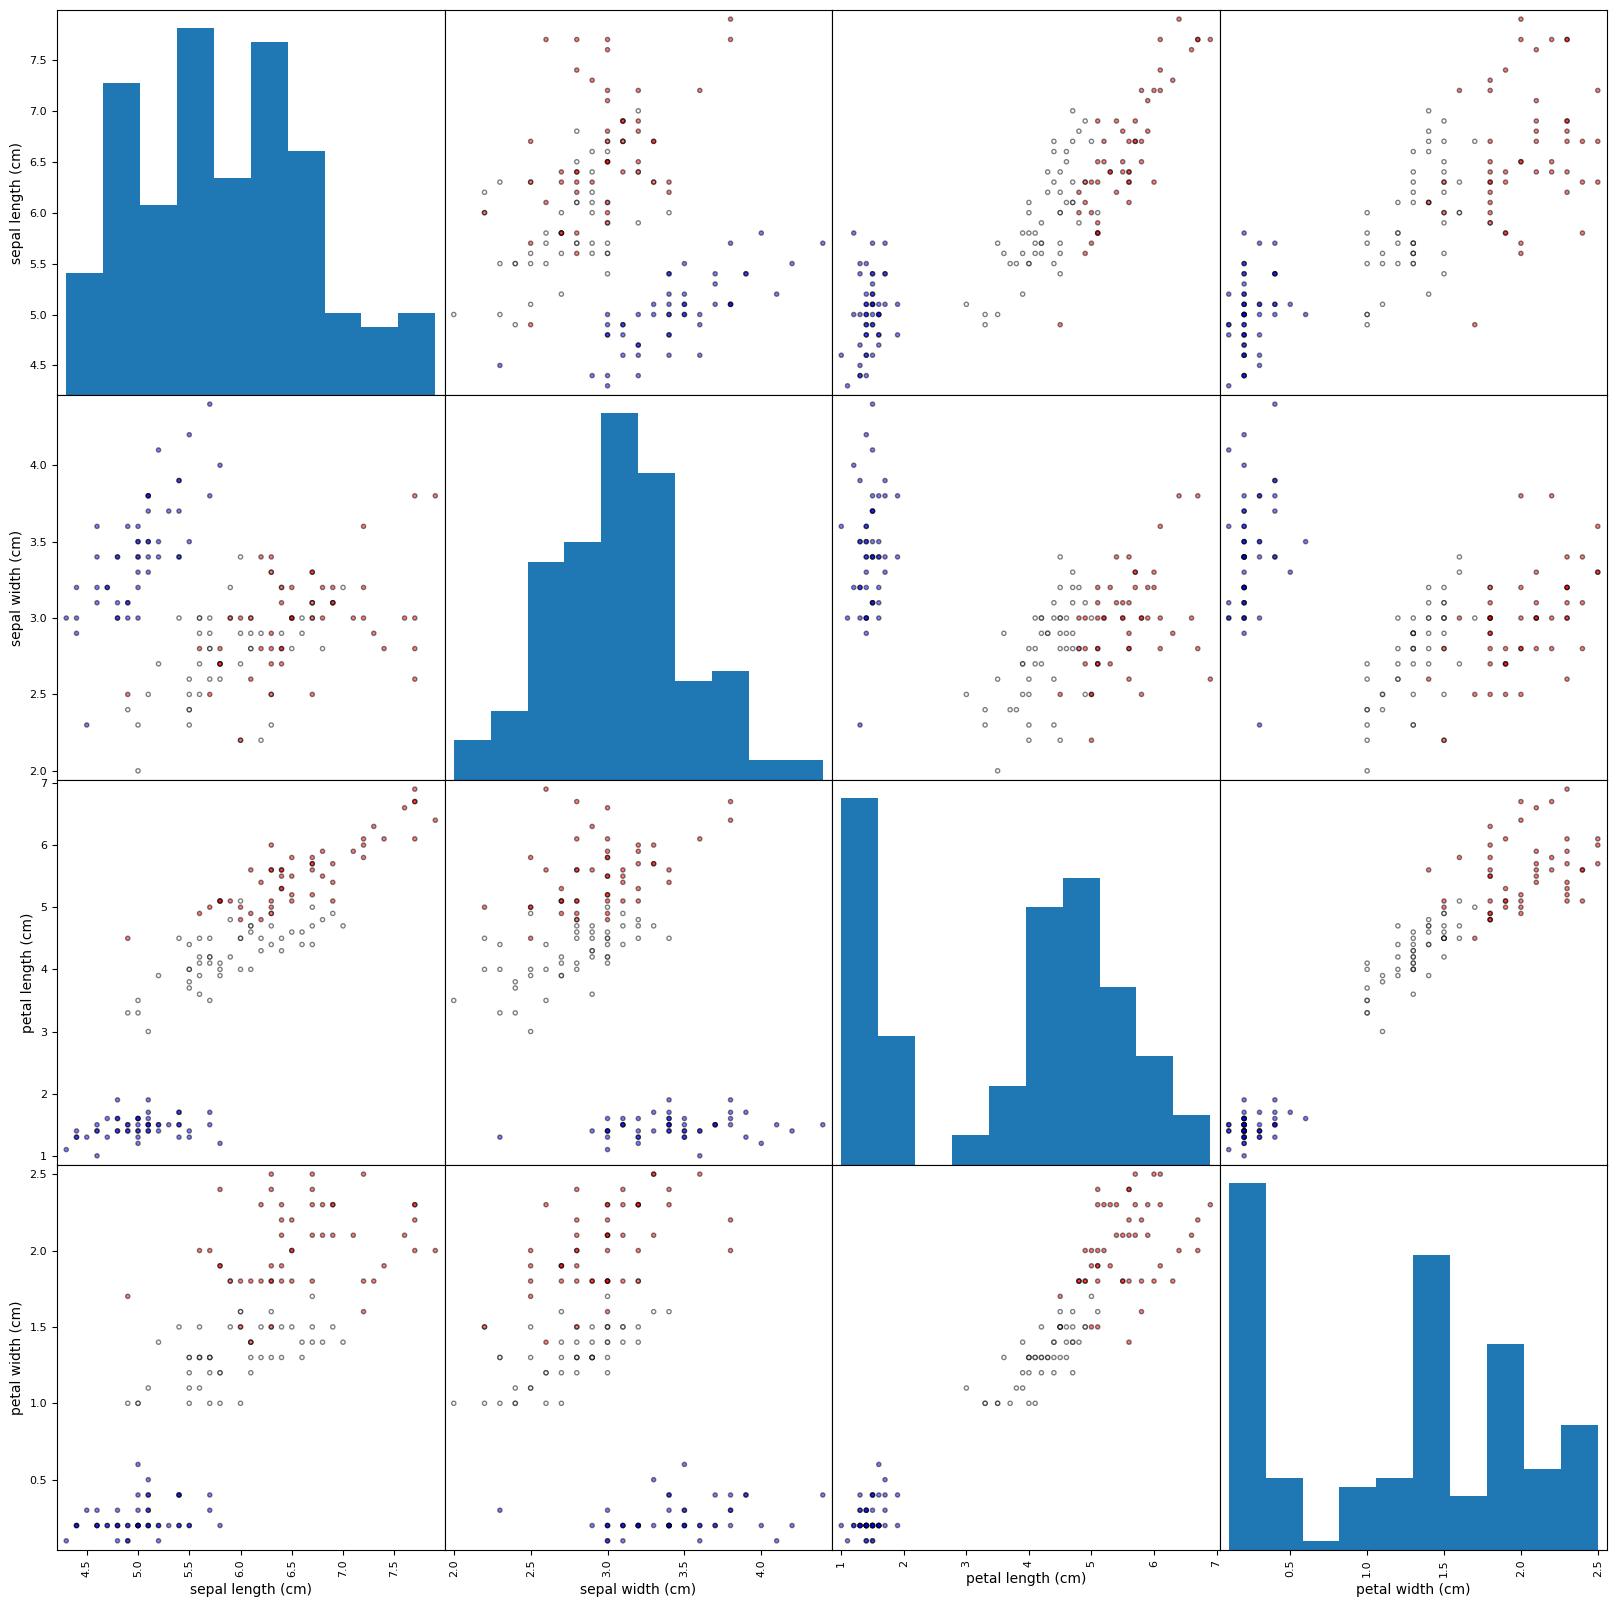

In [11]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap=CMAP, edgecolor='black', figsize=(20, 20))

In [12]:
# plt.savefig('ML_0701.png', bbox_inches='tight')

## Das künstliche Neuron

In [13]:
w0 = 3
w1 = -4
w2 = 2

def neuron_no_activation(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sum

In [14]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [15]:
neuron_no_activation(5.1, 3.5)

-10.399999999999999

### Activation Functions

In [16]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

#### Step Function: abrupter, nicht stetig differenzierbarer Übergang zwischen 0 und 1

In [17]:
def np_step(X):
    return 0.5 * (np.sign(X) + 1)

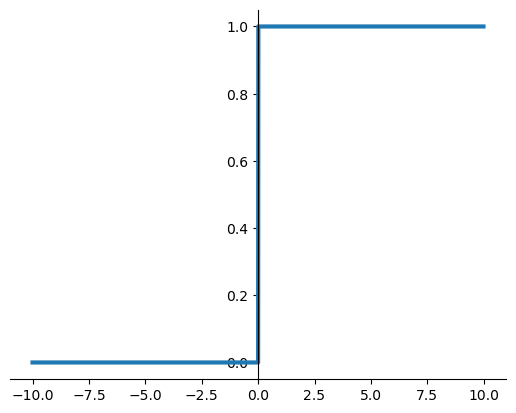

In [18]:
x = np.arange(-10,10,0.01)
y = np_step(x)

centerAxis()
plt.plot(x, y, lw=3)

#### Sigmoid Function: Fließender Übergang zwischen 0 und 1

In [19]:
def np_sigmoid(X):
    return 1 / (1 + np.exp(X * -1))

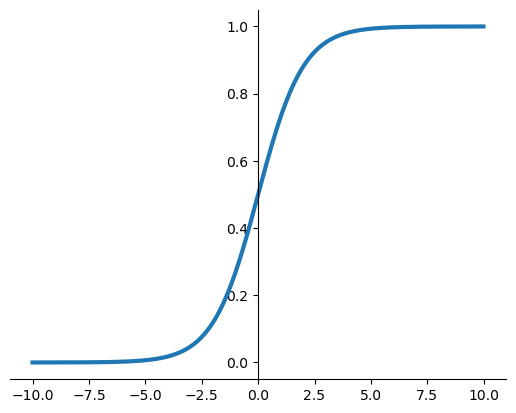

In [20]:
x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Tangens Hyperbolicus Function: Fließender Übergang zwischen -1 und 1

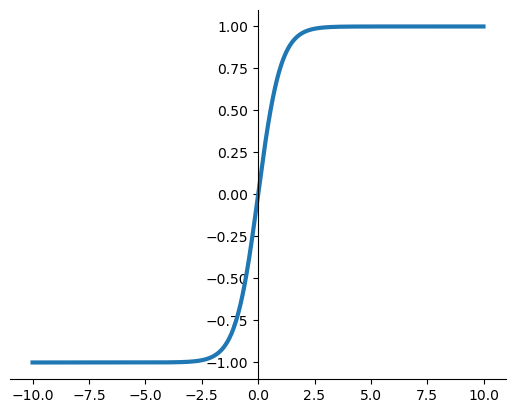

In [21]:
x = np.arange(-10,10,0.01)
y = np.tanh(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Relu: Einfach zu berechnen, setzt kompletten negativen Wertebereich auf 0

In [22]:
def np_relu(x):
    return np.maximum(0, x)

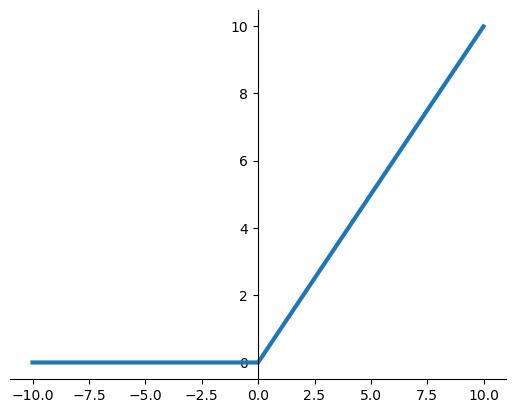

In [23]:
x = np.arange(-10,10,0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

In [24]:
# https://docs.python.org/3/library/math.html
import math as math
def sigmoid(x):
    return 1 / (1 + math.exp(x * -1))

w0 = 3
w1 = -4
w2 = 2

def neuron(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sigmoid(sum)

In [25]:
neuron(5.1, 3.5)

3.043155690056538e-05

In [26]:
# Version that takes as many values as you like
weights_with_bias = np.array([3, -4, 2])
def np_neuron(X):
    inputs_with_1_for_bias = np.concatenate((np.array([1]), X))
    return np_sigmoid(np.sum(inputs_with_1_for_bias*weights_with_bias));

In [27]:
np_neuron(np.array([5.1, 3.5]))

3.043155690056538e-05

## Unser erste Neuronales Netz mit Keras

In [28]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [29]:
from keras.layers import Dense
fc = Dense(3)(inputs)

In [30]:
from keras.models import Model
model = Model(inputs=inputs, outputs=fc)

In [31]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[-0.8277715 ,  3.7570474 ,  0.82742417]], dtype=float32)

In [34]:
inputs = Input(shape=(4, ))
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc)
model = Model(inputs=inputs, outputs=predictions)

In [35]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[8.4185505e-01, 1.5814488e-01, 9.1029385e-08]], dtype=float32)

# Training

In [38]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [39]:
y[100]

2

In [40]:
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [41]:
y[100]

array([0., 0., 1.], dtype=float32)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [44]:
# !rm -r tf_log

# https://keras.io/callbacks/#tensorboard
# tb_callback = keras.callbacks.TensorBoard(log_dir='./tf_log')
# To start tensorboard
# tensorboard --logdir=/mnt/c/Users/olive/Development/ml/tf_log
# open http://localhost:6006

In [45]:
# %time model.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[tb_callback])
%time model.fit(X_train, y_train, epochs=500, validation_split=0.3)

Epoch 1/500
3/3 [==============================] - 0s 79ms/step - loss: 6.2415 - accuracy: 0.3452 - val_loss: 6.1309 - val_accuracy: 0.3056
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 6.1358 - accuracy: 0.3452 - val_loss: 6.0217 - val_accuracy: 0.3056
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 6.0353 - accuracy: 0.3452 - val_loss: 5.9146 - val_accuracy: 0.3056
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 5.9259 - accuracy: 0.3452 - val_loss: 5.8099 - val_accuracy: 0.3056
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 5.8292 - accuracy: 0.3452 - val_loss: 5.7061 - val_accuracy: 0.3056
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 5.7215 - accuracy: 0.3452 - val_loss: 5.6057 - val_accuracy: 0.3056
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 5.6355 - accuracy: 0.3452 - val_loss: 5.5052 - val_accuracy: 0.3056
Epoch 8/500
3/3 [======

3/3 [==============================] - 0s 14ms/step - loss: 1.1538 - accuracy: 0.3571 - val_loss: 1.0916 - val_accuracy: 0.3056
Epoch 60/500
3/3 [==============================] - 0s 14ms/step - loss: 1.1113 - accuracy: 0.3810 - val_loss: 1.0519 - val_accuracy: 0.3056
Epoch 61/500
3/3 [==============================] - 0s 13ms/step - loss: 1.0715 - accuracy: 0.3810 - val_loss: 1.0181 - val_accuracy: 0.3889
Epoch 62/500
3/3 [==============================] - 0s 13ms/step - loss: 1.0398 - accuracy: 0.3810 - val_loss: 0.9900 - val_accuracy: 0.3889
Epoch 63/500
3/3 [==============================] - 0s 12ms/step - loss: 1.0116 - accuracy: 0.4286 - val_loss: 0.9669 - val_accuracy: 0.5000
Epoch 64/500
3/3 [==============================] - 0s 13ms/step - loss: 0.9857 - accuracy: 0.4524 - val_loss: 0.9491 - val_accuracy: 0.5556
Epoch 65/500
3/3 [==============================] - 0s 13ms/step - loss: 0.9668 - accuracy: 0.5119 - val_loss: 0.9351 - val_accuracy: 0.5556
Epoch 66/500
3/3 [========

3/3 [==============================] - 0s 12ms/step - loss: 0.8415 - accuracy: 0.6786 - val_loss: 0.8198 - val_accuracy: 0.6389
Epoch 118/500
3/3 [==============================] - 0s 13ms/step - loss: 0.8403 - accuracy: 0.6786 - val_loss: 0.8180 - val_accuracy: 0.6389
Epoch 119/500
3/3 [==============================] - 0s 13ms/step - loss: 0.8385 - accuracy: 0.6786 - val_loss: 0.8167 - val_accuracy: 0.6389
Epoch 120/500
3/3 [==============================] - 0s 11ms/step - loss: 0.8370 - accuracy: 0.6786 - val_loss: 0.8154 - val_accuracy: 0.6389
Epoch 121/500
3/3 [==============================] - 0s 13ms/step - loss: 0.8356 - accuracy: 0.6786 - val_loss: 0.8139 - val_accuracy: 0.6389
Epoch 122/500
3/3 [==============================] - 0s 13ms/step - loss: 0.8340 - accuracy: 0.6786 - val_loss: 0.8127 - val_accuracy: 0.6389
Epoch 123/500
3/3 [==============================] - 0s 15ms/step - loss: 0.8326 - accuracy: 0.6786 - val_loss: 0.8115 - val_accuracy: 0.6389
Epoch 124/500
3/3 [=

Epoch 175/500
3/3 [==============================] - 0s 13ms/step - loss: 0.7536 - accuracy: 0.7143 - val_loss: 0.7388 - val_accuracy: 0.6667
Epoch 176/500
3/3 [==============================] - 0s 13ms/step - loss: 0.7521 - accuracy: 0.7143 - val_loss: 0.7372 - val_accuracy: 0.6667
Epoch 177/500
3/3 [==============================] - 0s 13ms/step - loss: 0.7505 - accuracy: 0.7143 - val_loss: 0.7359 - val_accuracy: 0.6667
Epoch 178/500
3/3 [==============================] - 0s 14ms/step - loss: 0.7489 - accuracy: 0.7143 - val_loss: 0.7344 - val_accuracy: 0.6944
Epoch 179/500
3/3 [==============================] - 0s 14ms/step - loss: 0.7476 - accuracy: 0.7143 - val_loss: 0.7327 - val_accuracy: 0.6944
Epoch 180/500
3/3 [==============================] - 0s 13ms/step - loss: 0.7460 - accuracy: 0.7262 - val_loss: 0.7315 - val_accuracy: 0.6944
Epoch 181/500
3/3 [==============================] - 0s 13ms/step - loss: 0.7444 - accuracy: 0.7262 - val_loss: 0.7300 - val_accuracy: 0.6944
Epoch 

Epoch 233/500
3/3 [==============================] - 0s 14ms/step - loss: 0.6645 - accuracy: 0.7500 - val_loss: 0.6528 - val_accuracy: 0.8056
Epoch 234/500
3/3 [==============================] - 0s 13ms/step - loss: 0.6631 - accuracy: 0.7500 - val_loss: 0.6514 - val_accuracy: 0.8056
Epoch 235/500
3/3 [==============================] - 0s 13ms/step - loss: 0.6615 - accuracy: 0.7500 - val_loss: 0.6497 - val_accuracy: 0.8333
Epoch 236/500
3/3 [==============================] - 0s 13ms/step - loss: 0.6605 - accuracy: 0.7500 - val_loss: 0.6479 - val_accuracy: 0.8333
Epoch 237/500
3/3 [==============================] - 0s 13ms/step - loss: 0.6587 - accuracy: 0.7500 - val_loss: 0.6465 - val_accuracy: 0.8333
Epoch 238/500
3/3 [==============================] - 0s 13ms/step - loss: 0.6573 - accuracy: 0.7500 - val_loss: 0.6451 - val_accuracy: 0.8333
Epoch 239/500
3/3 [==============================] - 0s 12ms/step - loss: 0.6556 - accuracy: 0.7500 - val_loss: 0.6435 - val_accuracy: 0.8333
Epoch 

Epoch 291/500
3/3 [==============================] - 0s 13ms/step - loss: 0.5807 - accuracy: 0.7976 - val_loss: 0.5723 - val_accuracy: 0.8889
Epoch 292/500
3/3 [==============================] - 0s 13ms/step - loss: 0.5793 - accuracy: 0.7976 - val_loss: 0.5709 - val_accuracy: 0.8889
Epoch 293/500
3/3 [==============================] - 0s 14ms/step - loss: 0.5780 - accuracy: 0.7976 - val_loss: 0.5693 - val_accuracy: 0.8889
Epoch 294/500
3/3 [==============================] - 0s 13ms/step - loss: 0.5766 - accuracy: 0.8214 - val_loss: 0.5677 - val_accuracy: 0.9167
Epoch 295/500
3/3 [==============================] - 0s 14ms/step - loss: 0.5755 - accuracy: 0.8214 - val_loss: 0.5662 - val_accuracy: 0.9167
Epoch 296/500
3/3 [==============================] - 0s 13ms/step - loss: 0.5740 - accuracy: 0.8214 - val_loss: 0.5649 - val_accuracy: 0.9167
Epoch 297/500
3/3 [==============================] - 0s 13ms/step - loss: 0.5726 - accuracy: 0.8214 - val_loss: 0.5637 - val_accuracy: 0.9167
Epoch 

Epoch 349/500
3/3 [==============================] - 0s 12ms/step - loss: 0.5085 - accuracy: 0.8810 - val_loss: 0.4999 - val_accuracy: 0.9444
Epoch 350/500
3/3 [==============================] - 0s 15ms/step - loss: 0.5074 - accuracy: 0.8571 - val_loss: 0.4989 - val_accuracy: 0.9444
Epoch 351/500
3/3 [==============================] - 0s 15ms/step - loss: 0.5066 - accuracy: 0.8571 - val_loss: 0.4978 - val_accuracy: 0.9444
Epoch 352/500
3/3 [==============================] - 0s 15ms/step - loss: 0.5052 - accuracy: 0.8571 - val_loss: 0.4968 - val_accuracy: 0.9444
Epoch 353/500
3/3 [==============================] - 0s 17ms/step - loss: 0.5041 - accuracy: 0.8452 - val_loss: 0.4958 - val_accuracy: 0.9444
Epoch 354/500
3/3 [==============================] - 0s 19ms/step - loss: 0.5030 - accuracy: 0.8452 - val_loss: 0.4949 - val_accuracy: 0.9444
Epoch 355/500
3/3 [==============================] - 0s 15ms/step - loss: 0.5019 - accuracy: 0.8452 - val_loss: 0.4938 - val_accuracy: 0.9444
Epoch 

Epoch 407/500
3/3 [==============================] - 0s 16ms/step - loss: 0.4503 - accuracy: 0.9048 - val_loss: 0.4406 - val_accuracy: 0.9444
Epoch 408/500
3/3 [==============================] - 0s 16ms/step - loss: 0.4494 - accuracy: 0.9048 - val_loss: 0.4397 - val_accuracy: 0.9444
Epoch 409/500
3/3 [==============================] - 0s 16ms/step - loss: 0.4486 - accuracy: 0.9048 - val_loss: 0.4388 - val_accuracy: 0.9444
Epoch 410/500
3/3 [==============================] - 0s 10ms/step - loss: 0.4477 - accuracy: 0.9048 - val_loss: 0.4379 - val_accuracy: 0.9444
Epoch 411/500
3/3 [==============================] - 0s 10ms/step - loss: 0.4470 - accuracy: 0.9048 - val_loss: 0.4368 - val_accuracy: 0.9444
Epoch 412/500
3/3 [==============================] - 0s 12ms/step - loss: 0.4459 - accuracy: 0.9167 - val_loss: 0.4359 - val_accuracy: 0.9444
Epoch 413/500
3/3 [==============================] - 0s 15ms/step - loss: 0.4450 - accuracy: 0.9167 - val_loss: 0.4350 - val_accuracy: 0.9444
Epoch 

Epoch 465/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4045 - accuracy: 0.9405 - val_loss: 0.3927 - val_accuracy: 0.9722
Epoch 466/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4039 - accuracy: 0.9405 - val_loss: 0.3920 - val_accuracy: 0.9722
Epoch 467/500
3/3 [==============================] - 0s 14ms/step - loss: 0.4031 - accuracy: 0.9405 - val_loss: 0.3911 - val_accuracy: 0.9722
Epoch 468/500
3/3 [==============================] - 0s 14ms/step - loss: 0.4025 - accuracy: 0.9405 - val_loss: 0.3902 - val_accuracy: 0.9722
Epoch 469/500
3/3 [==============================] - 0s 14ms/step - loss: 0.4016 - accuracy: 0.9405 - val_loss: 0.3894 - val_accuracy: 1.0000
Epoch 470/500
3/3 [==============================] - 0s 13ms/step - loss: 0.4012 - accuracy: 0.9405 - val_loss: 0.3886 - val_accuracy: 1.0000
Epoch 471/500
3/3 [==============================] - 0s 13ms/step - loss: 0.4003 - accuracy: 0.9405 - val_loss: 0.3878 - val_accuracy: 1.0000
Epoch 47

# Bewertung

In [46]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[9.0277696e-01, 9.6378155e-02, 8.4494444e-04]], dtype=float32)

In [47]:
X[0], y[0]

(array([5.1, 3.5, 1.4, 0.2]), array([1., 0., 0.], dtype=float32))

In [48]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

4/4 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.9583


(0.37703293561935425, 0.9583333134651184)

In [49]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

1/1 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.9333


(0.356721431016922, 0.9333333373069763)